In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from keras.optimizers import Adam 
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

In [2]:
filepath = "datasets/wine.csv"
df = pd.read_csv(filepath)
df = df.drop("index", axis = 1)
df = df.sample(frac=1, random_state = 42, ignore_index=True)

In [3]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [4]:
pd.unique(y)

array([8, 5, 7, 6, 4, 3, 9], dtype=int64)

In [5]:
y = pd.get_dummies(y)
y

,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
6492,0,0,1,0,0,0,0
6493,0,0,0,0,1,0,0
6494,0,0,1,0,0,0,0
6495,0,0,1,0,0,0,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4547, 11)
(1950, 11)
(4547, 7)
(1950, 7)


In [7]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
print(X_train.shape)
print(X_test.shape)

(4547, 11)
(1950, 11)


In [8]:
input_dim = X_train.shape[1]

In [9]:
class_num = y.shape[1]
class_num

7

In [10]:
model = Sequential()
model.add(Dense(units=35, activation='relu'))
model.add(Dense(units=35, activation='relu'))
model.add(Dense(units=class_num,activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam',               
              metrics=['accuracy'])

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4547, 11)
(1950, 11)
(4547, 7)
(1950, 7)


In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100, shuffle=True, verbose=2)
print(history)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

143/143 - 0s - loss: 1.5128 - accuracy: 0.3987 - val_loss: 1.2762 - val_accuracy: 0.4472
Epoch 2/100
143/143 - 0s - loss: 1.2874 - accuracy: 0.4319 - val_loss: 1.2636 - val_accuracy: 0.4472
Epoch 3/100
143/143 - 0s - loss: 1.2802 - accuracy: 0.4319 - val_loss: 1.2611 - val_accuracy: 0.4472
Epoch 4/100
143/143 - 0s - loss: 1.2775 - accuracy: 0.4319 - val_loss: 1.2588 - val_accuracy: 0.4472
Epoch 5/100
143/143 - 0s - loss: 1.2770 - accuracy: 0.4273 - val_loss: 1.2610 - val_accuracy: 0.4451
Epo

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(18, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
plt.figure(figsize=(18, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

In [ ]:
loss_train_score, accuracy_train_score  = model.evaluate(X_train, y_train, verbose=0)
print(loss_train_score, accuracy_train_score)

In [ ]:
loss_test_score, accuracy_test_score  = model.evaluate(X_test, y_test, verbose=0)
print(loss_test_score, accuracy_test_score)

In [14]:
predictions = model.predict(X_test)
print(type(predictions))
predictions

<class 'numpy.ndarray'>


array([[8.3489268e-04, 3.0407978e-03, 2.2953717e-01, ..., 2.1623498e-01,
        3.7369702e-02, 1.8412474e-04],
       [4.4835485e-03, 2.8658953e-02, 2.9410365e-01, ..., 1.9396870e-01,
        4.1318983e-02, 1.1275117e-03],
       [1.4211590e-03, 6.0085002e-03, 1.9486630e-01, ..., 2.6634839e-01,
        4.7082145e-02, 3.8426867e-04],
       ...,
       [2.4441248e-03, 1.1662520e-02, 2.0401172e-01, ..., 2.6158607e-01,
        4.8005071e-02, 6.3637190e-04],
       [4.0827389e-03, 2.5258033e-02, 3.0795234e-01, ..., 1.8096116e-01,
        3.7854381e-02, 9.2984614e-04],
       [1.4487931e-03, 4.5762034e-03, 1.4182034e-01, ..., 2.7127174e-01,
        3.3717621e-02, 1.8151230e-04]], dtype=float32)

In [15]:
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>


In [16]:
y_test_cm = y_test.to_numpy()

In [18]:
print(y_test_cm.shape)
print(predictions.shape)

(1950, 7)
(1950, 7)


In [19]:
confusion_matrix(y_test_cm.argmax(axis=1), predictions.argmax(axis=1))

array([[  0,   0,   3,   6,   0,   0,   0],
       [  0,   0,  24,  28,   5,   0,   0],
       [  0,   0, 228, 403,   4,   0,   0],
       [  0,   0, 124, 724,  24,   0,   0],
       [  0,   0,  16, 274,  26,   0,   0],
       [  0,   0,   0,  54,   5,   0,   0],
       [  0,   0,   0,   2,   0,   0,   0]], dtype=int64)

In [22]:
conf_matrix = tf.math.confusion_matrix(labels=y_test_cm.argmax(axis=1),
                                       predictions=predictions.argmax(axis=1))

In [23]:
conf_matrix

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[  0,   0,   3,   6,   0,   0,   0],
       [  0,   0,  24,  28,   5,   0,   0],
       [  0,   0, 228, 403,   4,   0,   0],
       [  0,   0, 124, 724,  24,   0,   0],
       [  0,   0,  16, 274,  26,   0,   0],
       [  0,   0,   0,  54,   5,   0,   0],
       [  0,   0,   0,   2,   0,   0,   0]])>

In [25]:
plot_confusion_matrix(model, X_test, y_test)

ValueError: plot_confusion_matrix only supports classifiers

In [37]:
labels = ['3',"4","5","6","7","8","9"]

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'max'

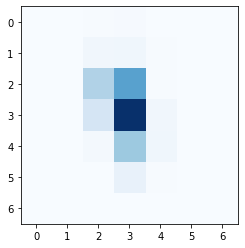

In [36]:

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

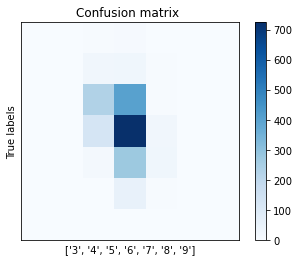

In [38]:
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.xlabel(labels)
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [ ]:
# # Accuracy calculated using Keras' method
# metric = tf.keras.metrics.Accuracy()
# metric.update_state(yTrue,yPred)
# metric.result().numpy(

In [ ]:
# model = Sequential()
# model.add(Flatten())
# model.add(Dense(units=class_num,activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam',               
#               metrics=['accuracy'])
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=800, shuffle=False, verbose=0)
# print(history)
# loss_train_score, accuracy_train_score  = model.evaluate(X_train, y_train, verbose=0)
# print(loss_train_score, accuracy_train_score)
# loss_test_score, accuracy_test_score  = model.evaluate(X_test, y_test, verbose=0)
# print(loss_test_score, accuracy_test_score)